# Objetivo:
 
 - Selecionar apenas carros populares do dataset. 
 - Encontrar o melhor algoritmo  para fazer a previsão do preço dos carros populares. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/2%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/carros_pre_processado.csv'


# url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/carros_ml_pre_processados.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,motor,marca,modelo,preco,quilometragem,ano,informacoes
0,1.4,Chevrolet,Agile,25990,91000,2011,Agile 1.4 Lt 5p
1,1.4,Chevrolet,Agile,28900,123915,2013,Agile 1.4 Ltz 5p
2,1.4,Chevrolet,Agile,28000,91000,2013,Agile 1.4 Lt 5p
3,1.4,Chevrolet,Agile,26890,151000,2011,Agile 1.4 Mpfi Ltz 8v
4,1.4,Chevrolet,Agile,31990,106863,2014,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df['quilometragem'] = df['quilometragem'].str.replace(',','0')
df['quilometragem'] = df['quilometragem'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16735 entries, 0 to 16734
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          15613 non-null  float64
 1   marca          16735 non-null  object 
 2   modelo         16735 non-null  object 
 3   preco          16735 non-null  int64  
 4   quilometragem  16735 non-null  float64
 5   ano            16735 non-null  int64  
 6   informacoes    16735 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 915.3+ KB


In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,15613.0,1.880000e+00,7.100000e-01,1.0,1.5,1.8,2.0,6.200000e+00
preco,16735.0,8.156294e+04,5.011212e+05,1000.0,30998.5,51800.0,89845.0,3.990000e+07
quilometragem,16735.0,5.975500e+14,7.730136e+16,-558038585.0,30894.5,75000.0,118000.0,1.000000e+19
ano,16735.0,2.013770e+03,5.770000e+00,1968.0,2011.0,2014.0,2018.0,2.022000e+03


In [8]:
df.isna().sum()

motor            1122
marca               0
modelo              0
preco               0
quilometragem       0
ano                 0
informacoes         0
dtype: int64

In [9]:
df = df.dropna()

##  Criando o dataframe carros populares.



In [ ]:
df.marca.value_counts()

Chevrolet        2177
Volkswagen       1816
Fiat             1752
Renault          1007
Hyundai          1007
Ford              956
Citroën           937
Peugeot           826
Nissan            643
Toyota            635
Land              552
Mitsubishi        545
Kia               520
Honda             517
Mercedes-benz     506
Bmw               486
Jeep              368
Audi              270
Suzuki             93
Name: marca, dtype: int64

 - Selecionando as marcas 

In [10]:
filtro_carros_populares = ['Chevrolet','Volkswagen','Fiat','Renault','Hyundai','Ford',
 'Citroën','Peugeot','Nissan','Toyota','Mitsubishi','Kia','Honda','Suzuki']

In [11]:
carros_populares = df.set_index('marca')
carros_populares = carros_populares.loc[filtro_carros_populares]
carros_populares = carros_populares.reset_index()

 - Estababelecendo condições para selecionar apenas carros populares

In [13]:
carros_populares = carros_populares.query('preco<=80000')
carros_populares = carros_populares.query('preco >= 5000')
carros_populares = carros_populares.query('quilometragem >= 5000')

In [14]:
carros_populares.shape

(9499, 7)

In [15]:
carros_populares.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9499.0,1.71,0.55,1.0,1.4,1.6,2.0,6.2
preco,9499.0,40163.98,18052.65,5000.0,25900.0,36900.0,52900.0,80000.0
quilometragem,9499.0,108159.72,91639.74,5000.0,62086.5,96000.0,133378.5,999999.0
ano,9499.0,2012.52,5.23,1973.0,2010.0,2013.0,2016.0,2021.0


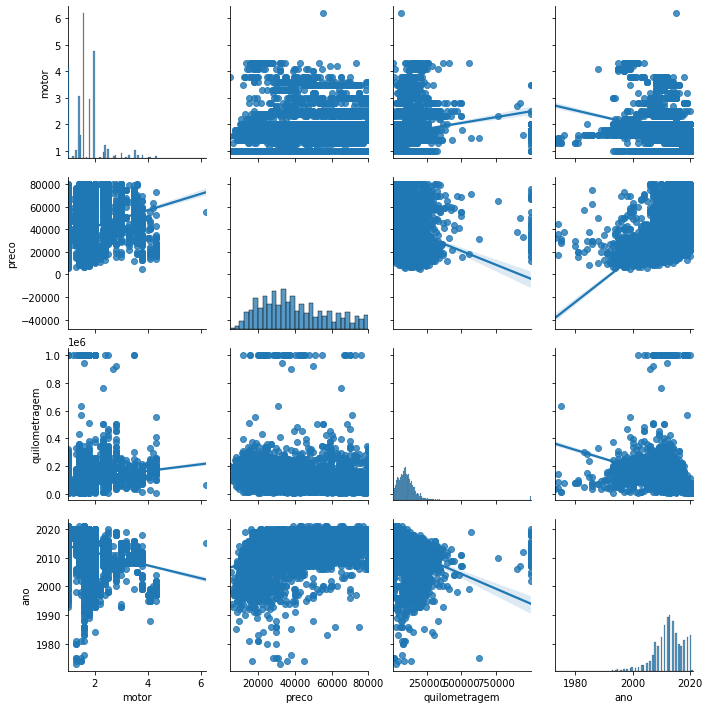

In [17]:
sns.pairplot(data=carros_populares, kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5757f490>,
      dtype=object)

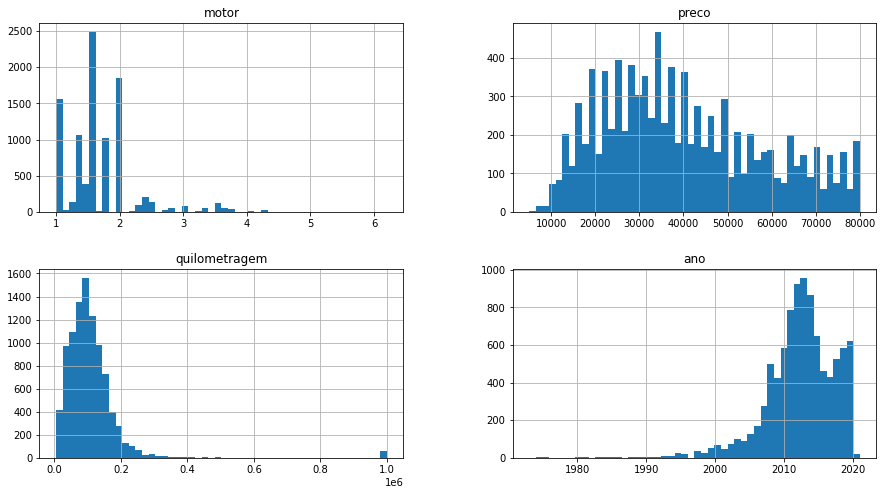

In [18]:
carros_populares.hist(bins=50, figsize=(15,8))

In [31]:
carros_populares = carros_populares.query('quilometragem <=210000')

In [32]:
dados = carros_populares

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c56e58c50>,
      dtype=object)

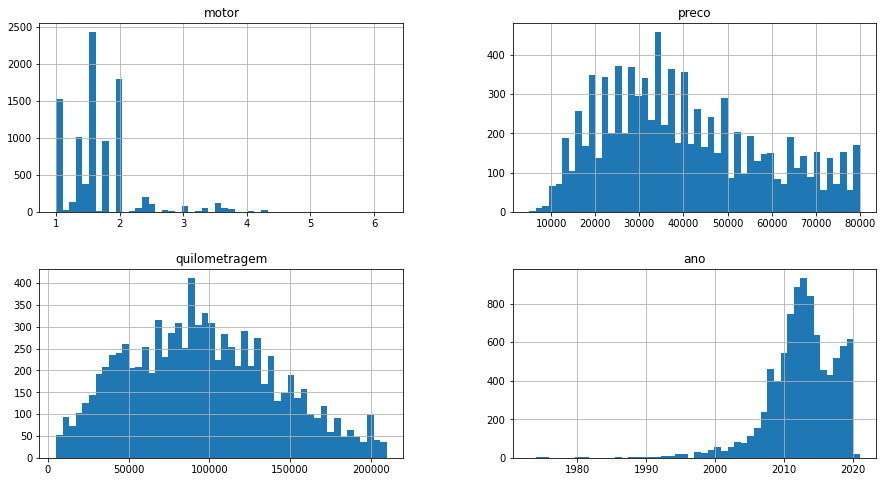

In [33]:
dados.hist(bins=50, figsize=(15,8))

In [34]:
dados.shape

(9073, 7)

In [35]:
dados = dados.query('ano >= 2008')

In [36]:
dados.shape

(8071, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c56180f90>,
      dtype=object)

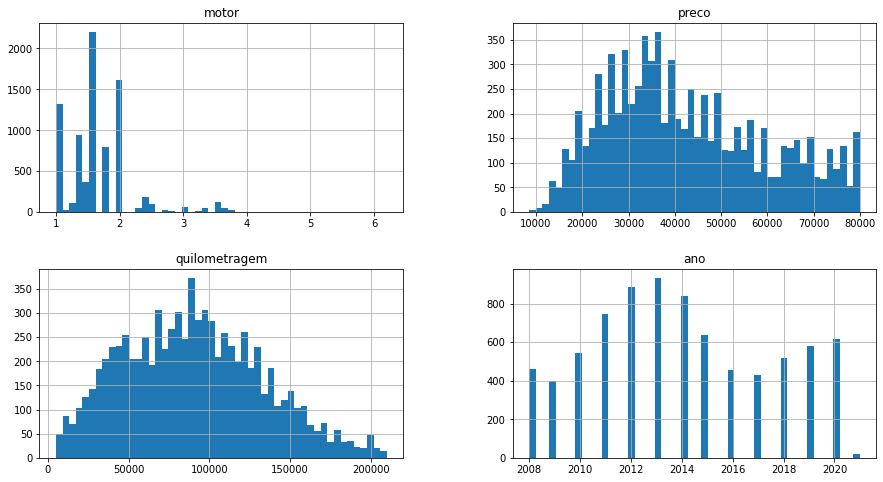

In [37]:
dados.hist(bins=50, figsize=(15,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


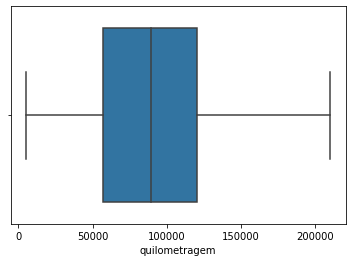

In [38]:
sns.boxplot(dados['quilometragem'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


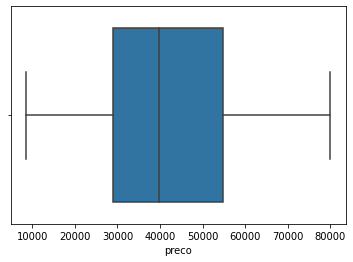

In [39]:
sns.boxplot(dados['preco'])

In [40]:
dados.modelo.value_counts()

Aircross     89
I30          88
March        88
Punto        86
voyage       86
             ..
Camaro        1
Classe-C      1
Hilux         1
Sprinter      1
Hilux-SW4     1
Name: modelo, Length: 153, dtype: int64

In [50]:
# pd.set_option('display.max_rows', 250)
# dados.modelo.value_counts().head(250)

In [49]:
dados.modelo.value_counts().tail(29)

Clio-Sedan     23
HR             23
Tiguan         22
S10            20
C3-Aircross    19
RAV4           19
HB20X          18
Omega          16
Frontier       16
Parati         15
Creta          12
blazer         11
Ranger         11
Classe-A       10
L200           10
Toro            9
Jumper          9
Amarok          9
Ducato          6
T-Cross         6
Trailblaze      5
Escort          4
Master          2
SW4             2
Camaro          1
Classe-C        1
Hilux           1
Sprinter        1
Hilux-SW4       1
Name: modelo, dtype: int64

In [51]:
drop = list(dict(dados.modelo.value_counts().tail(29)).keys())
dados = dados.set_index('modelo')
dados = dados.drop(drop)
dados = dados.reset_index()

In [52]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,7769.0,1.66,0.50,1.0,1.4,1.6,2.0,3.8
preco,7769.0,42239.35,16867.66,8500.0,28990.0,38969.0,53990.0,80000.0
quilometragem,7769.0,89710.59,42726.23,5000.0,56320.0,88502.0,119769.0,210000.0
ano,7769.0,2014.00,3.50,2008.0,2011.0,2014.0,2017.0,2021.0


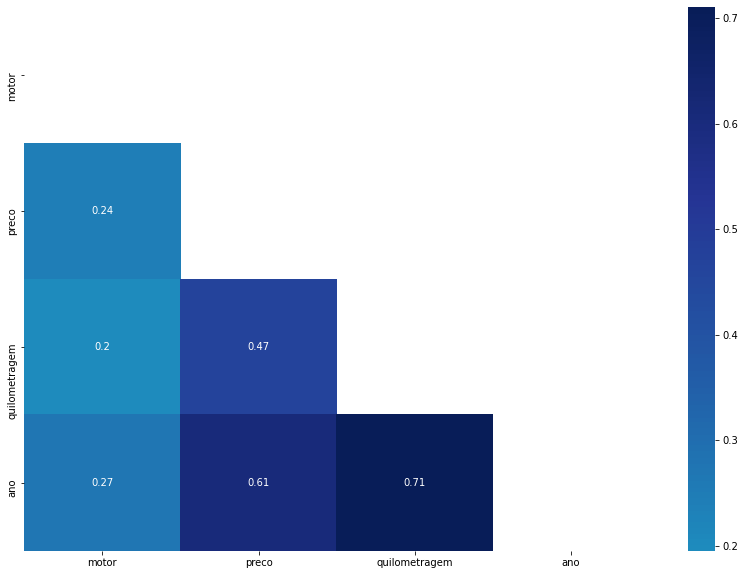

In [53]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

## Definindo as amostras de treino e teste

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
enconder = LabelEncoder()

In [56]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

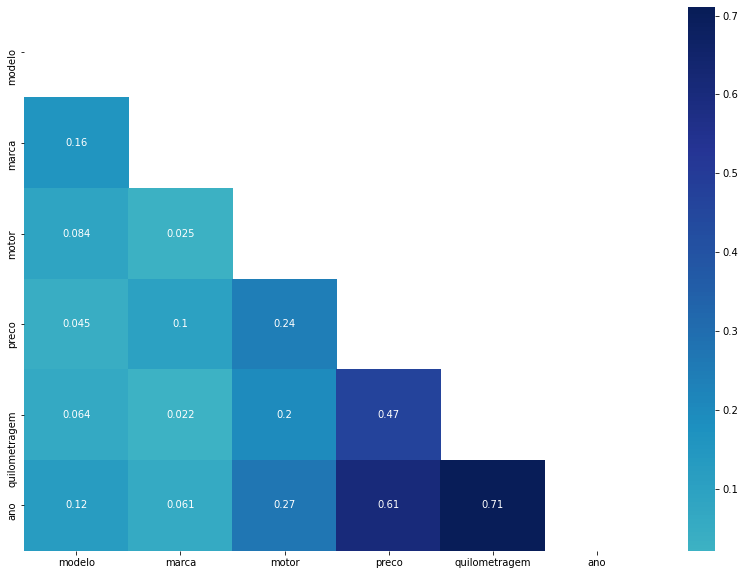

In [57]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [61]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [62]:
# treino['preco'] = treino['preco'].apply(np.log1p)
# treino['quilometragem'] = treino['quilometragem'].apply(np.log1p)
# teste['preco'] = teste['preco'].apply(np.log1p)
# teste['quilometragem'] = teste['quilometragem'].apply(np.log1p)

 - Modelo "Baseline" (Ponto de partida)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.5496783466338998

 - Machine learning

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9919558664084195
Test score 0.6142355679386382
Treinando RandomForestRegressor
Train score 0.9626163804012353
Test score 0.7658609792459447
Treinando MLPRegressor
Train score 0.24015941902425797
Test score 0.23124937846666016
Treinando XGBRegressor
[16:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.7516060828328912
Test score 0.7250702283826602


In [66]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9919558664084195
Validation score [0.56303125 0.58788319 0.64932038 0.57762366 0.55642131]
Test score 0.6130153499721227
Treinando RandomForestRegressor
Train score 0.9613687516054564
Validation score [0.74092442 0.78497207 0.78864628 0.73402184 0.72535034]
Test score 0.7689946268882453
Treinando MLPRegressor
Train score 0.24257188875124513
Validation score [0.21173969 0.21669478 0.26672258 0.22617343 0.24801439]
Test score 0.2318633453759662
Treinando XGBRegressor
[16:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters=[{ 'max_features':['auto', 'sqrt', 'log2'],
#              'max_depth':[3,4,5,6,7,8],
#              'n_estimators':[50, 100,150,200,250]}]
            
# reg = RandomForestRegressor(n_estimators=100, max_depth=1)
# gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
# gs.fit(X_treino, Y_treino)
# reg = gs.best_estimator_

# train_score = reg.score(X_treino, Y_treino)
# val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
# test_score = reg.score(X_teste, Y_teste)
# print('Train score', train_score)
# print('Validation score', val_score)
# print('Test score', test_score)

## Gridsearch XGBRegressor

In [83]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)
xgb = gs.best_estimator_

train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[17:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.8793083585337251
Validation score [0.75279048 0.78584254 0.76135513]
Test score 0.7783948755450683


 - Calculando o erro

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [84]:
y_pred = xgb.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 5209.5274
MSE = 61249052.6102
RMSE = 7826.1774
R2 = 0.7784


## Gridsearch RandomForest

In [69]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.862154756491635
Validation score [0.74650719 0.7941035  0.7964869  0.74420985 0.74250781]
Test score 0.770227629206796


 - Calculando o erro

In [72]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 5368.1347
MSE = 63506383.5356
RMSE = 7969.0893
R2 = 0.7702
